<a href="https://colab.research.google.com/github/Lavinia-dsci/pracgit/blob/main/scRNA_seq_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installations to set up Scanpy environment.

In [3]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 87.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [6]:
#Import the core single cell tools

import scanpy as sc
import anndata as ad
b_marrow_adata = sc.read_h5ad("/content/bone_marrow.h5ad")
print(b_marrow_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [7]:
# Exploration of dataset
b_marrow_adata.shape

(14783, 17374)

In [8]:
# Exploration of dataset
b_marrow_adata.var.head()

n_cells  feature_is_filtered feature_name feature_reference  \
ENSG00000161920      927                False        MED11    NCBITaxon:9606   
ENSG00000122335      429                False       SERAC1    NCBITaxon:9606   
ENSG00000175548      149                False       ALG10B    NCBITaxon:9606   
ENSG00000100330      426                False        MTMR3    NCBITaxon:9606   
ENSG00000176340     7171                False        COX8A    NCBITaxon:9606   

                feature_biotype feature_length    feature_type  
ENSG00000161920            gene            754  protein_coding  
ENSG00000122335            gene           2683  protein_coding  
ENSG00000175548            gene           1773  protein_coding  
ENSG00000100330            gene            634  protein_coding  
ENSG00000176340            gene            494  protein_coding

In [9]:
# Exploration of dataset
b_marrow_adata.obs.head()

disease stage                    treatment timepoint  \
index                                                                         
Guo-AAACCTGAGAGCTTCT-2        severe  400 mg Tocilizumab at day 1     day 1   
Guo-AAACCTGAGAGGTTGC-7     remission  400 mg Tocilizumab at day 1     day 7   
Guo-AAACCTGAGATACACA-3     remission  400 mg Tocilizumab at day 1     day 5   
Guo-AAACCTGAGCGATTCT-1        severe  400 mg Tocilizumab at day 1     day 1   
Guo-AAACCTGAGTGAAGAG-3     remission  400 mg Tocilizumab at day 1     day 5   

                                                Dataset            sample  \
index                                                                       
Guo-AAACCTGAGAGCTTCT-2  Guo et al._Nature Communication  Guo_P1-day1-rep2   
Guo-AAACCTGAGAGGTTGC-7  Guo et al._Nature Communication       Guo_P2-day7   
Guo-AAACCTGAGATACACA-3  Guo et al._Nature Communication  Guo_P1-day5-rep1   
Guo-AAACCTGAGCGATTCT-1  Guo et al._Nature Communication  Guo_P1-day1-rep1   
Guo-AAACCTGAGTGAAGAG-3  Guo et al._Nature Communication  Guo_P1-day5-rep1   

                               disease_original  \
index                                             
Guo-AAACCTGAGAGCTTCT-2          COVID-19 Severe   
Guo-AAACCTGAGAGGTTGC-7  COVID-19 Mild/Remission   
Guo-AAACCTGAGATACACA-3  COVID-19 Mild/Remission   
Guo-AAACCTGAGCGATTCT-1          COVID-19 Severe   
Guo-AAACCTGAGTGAAGAG-3  COVID-19 Mild/Remission   

                                        disease_general COVID-19 Condition  \
index                                                                        
Guo-AAACCTGAGAGCTTCT-2  COVID-19 Severe/Late stage/Vent             severe   
Guo-AAACCTGAGAGGTTGC-7               COVID-19 Remission          remission   
Guo-AAACCTGAGATACACA-3               COVID-19 Remission          remission   
Guo-AAACCTGAGCGATTCT-1  COVID-19 Severe/Late stage/Vent             severe   
Guo-AAACCTGAGTGAAGAG-3               COVID-19 Remission          remission   

                              Lineage      Cell.group  ... is_primary_data  \
index                                                  ...                   
Guo-AAACCTGAGAGCTTCT-2        Myeloid  CD14+ Monocyte  ...           False   
Guo-AAACCTGAGAGGTTGC-7  Lymphoid_T/NK     CD8+ T cell  ...           False   
Guo-AAACCTGAGATACACA-3  Lymphoid_T/NK     CD4+ T cell  ...           False   
Guo-AAACCTGAGCGATTCT-1  Lymphoid_T/NK     CD8+ T cell  ...           False   
Guo-AAACCTGAGTGAAGAG-3  Lymphoid_T/NK     CD4+ T cell  ...           False   

                        suspension_type  tissue_type      assay   disease  \
index                                                                       
Guo-AAACCTGAGAGCTTCT-2             cell       tissue  10x 3' v2  COVID-19   
Guo-AAACCTGAGAGGTTGC-7             cell       tissue  10x 3' v2  COVID-19   
Guo-AAACCTGAGATACACA-3             cell       tissue  10x 3' v2  COVID-19   
Guo-AAACCTGAGCGATTCT-1             cell       tissue  10x 3' v2  COVID-19   
Guo-AAACCTGAGTGAAGAG-3             cell       tissue  10x 3' v2  COVID-19   

                         sex tissue self_reported_ethnicity  \
index                                                         
Guo-AAACCTGAGAGCTTCT-2  male  blood                 unknown   
Guo-AAACCTGAGAGGTTGC-7  male  blood                 unknown   
Guo-AAACCTGAGATACACA-3  male  blood                 unknown   
Guo-AAACCTGAGCGATTCT-1  male  blood                 unknown   
Guo-AAACCTGAGTGAAGAG-3  male  blood                 unknown   

                        development_stage observation_joinid  
index                                                         
Guo-AAACCTGAGAGCTTCT-2  39-year-old stage         2P)e%zgsv_  
Guo-AAACCTGAGAGGTTGC-7  78-year-old stage         Lv&N1yD6*0  
Guo-AAACCTGAGATACACA-3  39-year-old stage         DZ>`^5OH2o  
Guo-AAACCTGAGCGATTCT-1  39-year-old stage         J4$QmqEgvX  
Guo-AAACCTGAGTGAAGAG-3  39-year-old stage         Y&7u#&E`-T  

[5 rows x 33 columns]

In [10]:
# Exploration of dataset
b_marrow_adata.to_df()

ENSG00000161920  ENSG00000122335  ENSG00000175548  \
index                                                                       
Guo-AAACCTGAGAGCTTCT-2              0.0         0.000000              0.0   
Guo-AAACCTGAGAGGTTGC-7              0.0         0.000000              0.0   
Guo-AAACCTGAGATACACA-3              0.0         8.651494              0.0   
Guo-AAACCTGAGCGATTCT-1              0.0         0.000000              0.0   
Guo-AAACCTGAGTGAAGAG-3              0.0         0.000000              0.0   
...                                 ...              ...              ...   
Guo-TTTGTCAGTTTCGCTC-4              0.0         0.000000              0.0   
Guo-TTTGTCATCAGAGACG-7              0.0         0.000000              0.0   
Guo-TTTGTCATCAGATAAG-4              0.0         0.000000              0.0   
Guo-TTTGTCATCTCCTATA-4              0.0         0.000000              0.0   
Guo-TTTGTCATCTGCGGCA-2              0.0         0.000000              0.0   

                        ENSG00000100330  ENSG00000176340  ENSG00000179846  \
index                                                                       
Guo-AAACCTGAGAGCTTCT-2              0.0         9.436466              0.0   
Guo-AAACCTGAGAGGTTGC-7              0.0         0.000000              0.0   
Guo-AAACCTGAGATACACA-3              0.0         8.651494              0.0   
Guo-AAACCTGAGCGATTCT-1              0.0         8.858533              0.0   
Guo-AAACCTGAGTGAAGAG-3              0.0         0.000000              0.0   
...                                 ...              ...              ...   
Guo-TTTGTCAGTTTCGCTC-4              0.0         8.389465              0.0   
Guo-TTTGTCATCAGAGACG-7              0.0         9.931639              0.0   
Guo-TTTGTCATCAGATAAG-4              0.0        10.009642              0.0   
Guo-TTTGTCATCTCCTATA-4              0.0         8.848565              0.0   
Guo-TTTGTCATCTGCGGCA-2              0.0         0.000000              0.0   

                        ENSG00000204860  ENSG00000172260  ENSG00000141424  \
index                                                                       
Guo-AAACCTGAGAGCTTCT-2              0.0              0.0         0.000000   
Guo-AAACCTGAGAGGTTGC-7              0.0              0.0         8.817776   
Guo-AAACCTGAGATACACA-3              0.0              0.0         0.000000   
Guo-AAACCTGAGCGATTCT-1              0.0              0.0         0.000000   
Guo-AAACCTGAGTGAAGAG-3              0.0              0.0         0.000000   
...                                 ...              ...              ...   
Guo-TTTGTCAGTTTCGCTC-4              0.0              0.0         0.000000   
Guo-TTTGTCATCAGAGACG-7              0.0              0.0         0.000000   
Guo-TTTGTCATCAGATAAG-4              0.0              0.0         0.000000   
Guo-TTTGTCATCTCCTATA-4              0.0              0.0         0.000000   
Guo-TTTGTCATCTGCGGCA-2              0.0              0.0         0.000000   

                        ENSG00000164512  ...  ENSG00000164114  \
index                                    ...                    
Guo-AAACCTGAGAGCTTCT-2              0.0  ...              0.0   
Guo-AAACCTGAGAGGTTGC-7              0.0  ...              0.0   
Guo-AAACCTGAGATACACA-3              0.0  ...              0.0   
Guo-AAACCTGAGCGATTCT-1              0.0  ...              0.0   
Guo-AAACCTGAGTGAAGAG-3              0.0  ...              0.0   
...                                 ...  ...              ...   
Guo-TTTGTCAGTTTCGCTC-4              0.0  ...              0.0   
Guo-TTTGTCATCAGAGACG-7              0.0  ...              0.0   
Guo-TTTGTCATCAGATAAG-4              0.0  ...              0.0   
Guo-TTTGTCATCTCCTATA-4              0.0  ...              0.0   
Guo-TTTGTCATCTGCGGCA-2              0.0  ...              0.0   

                        ENSG00000151702  ENSG00000224578  ENSG00000138756  \
index                                                                       
Guo-AAACCTGAGAGCTT

""" Quality Control (QC) - Standardize gene names to be unique (fix duplicates)
Remove cells with very few detected genes (low-quality or dying)
Remove cells with very many detected genes (potential doublets)
Remove genes expressed in only a small number of cells """

In [11]:
# Standardize gene names
b_marrow_adata.var_names_make_unique()
b_marrow_adata.obs_names_make_unique()

In [14]:
#Identify contamination
#Mitochondrial genes: MT- prefix (human-style)
b_marrow_adata.var['MT'] = b_marrow_adata.var_names.str.startswith("MT-")

#Ribosomal: RPS* and RPL*
b_marrow_adata.var['RIBO'] = b_marrow_adata.var_names.str.startswith(("RPS", "RPL"))

 #Hemoglobin: selected known genes
hb_gene_list = ['HBA1', 'HBA2', 'HBB', 'HBD', 'HBG1', 'HBG2']
# Convert var_names to uppercase for case-insensitive comparison with hb_gene_list
sym_upper = b_marrow_adata.var_names.str.upper()
# Set 'HB' to True for genes whose uppercase names are in hb_gene_list
b_marrow_adata.var['HB'] = sym_upper.isin(hb_gene_list)

# Quick sanity check: how many genes in each category?
b_marrow_adata.var[['MT', 'RIBO', 'HB']].sum()

MT      0
RIBO    0
HB      0
dtype: int64

In [15]:
#Calculating QC metrics
sc.pp.calculate_qc_metrics(
    b_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)
b_marrow_adata.obs.head()

disease stage                    treatment timepoint  \
index                                                                         
Guo-AAACCTGAGAGCTTCT-2        severe  400 mg Tocilizumab at day 1     day 1   
Guo-AAACCTGAGAGGTTGC-7     remission  400 mg Tocilizumab at day 1     day 7   
Guo-AAACCTGAGATACACA-3     remission  400 mg Tocilizumab at day 1     day 5   
Guo-AAACCTGAGCGATTCT-1        severe  400 mg Tocilizumab at day 1     day 1   
Guo-AAACCTGAGTGAAGAG-3     remission  400 mg Tocilizumab at day 1     day 5   

                                                Dataset            sample  \
index                                                                       
Guo-AAACCTGAGAGCTTCT-2  Guo et al._Nature Communication  Guo_P1-day1-rep2   
Guo-AAACCTGAGAGGTTGC-7  Guo et al._Nature Communication       Guo_P2-day7   
Guo-AAACCTGAGATACACA-3  Guo et al._Nature Communication  Guo_P1-day5-rep1   
Guo-AAACCTGAGCGATTCT-1  Guo et al._Nature Communication  Guo_P1-day1-rep1   
Guo-AAACCTGAGTGAAGAG-3  Guo et al._Nature Communication  Guo_P1-day5-rep1   

                               disease_original  \
index                                             
Guo-AAACCTGAGAGCTTCT-2          COVID-19 Severe   
Guo-AAACCTGAGAGGTTGC-7  COVID-19 Mild/Remission   
Guo-AAACCTGAGATACACA-3  COVID-19 Mild/Remission   
Guo-AAACCTGAGCGATTCT-1          COVID-19 Severe   
Guo-AAACCTGAGTGAAGAG-3  COVID-19 Mild/Remission   

                                        disease_general COVID-19 Condition  \
index                                                                        
Guo-AAACCTGAGAGCTTCT-2  COVID-19 Severe/Late stage/Vent             severe   
Guo-AAACCTGAGAGGTTGC-7               COVID-19 Remission          remission   
Guo-AAACCTGAGATACACA-3               COVID-19 Remission          remission   
Guo-AAACCTGAGCGATTCT-1  COVID-19 Severe/Late stage/Vent             severe   
Guo-AAACCTGAGTGAAGAG-3               COVID-19 Remission          remission   

                              Lineage      Cell.group  ...  \
index                                                  ...   
Guo-AAACCTGAGAGCTTCT-2        Myeloid  CD14+ Monocyte  ...   
Guo-AAACCTGAGAGGTTGC-7  Lymphoid_T/NK     CD8+ T cell  ...   
Guo-AAACCTGAGATACACA-3  Lymphoid_T/NK     CD4+ T cell  ...   
Guo-AAACCTGAGCGATTCT-1  Lymphoid_T/NK     CD8+ T cell  ...   
Guo-AAACCTGAGTGAAGAG-3  Lymphoid_T/NK     CD4+ T cell  ...   

                       pct_counts_in_top_500_genes  total_counts_MT  \
index                                                                 
Guo-AAACCTGAGAGCTTCT-2                   40.537370              0.0   
Guo-AAACCTGAGAGGTTGC-7                   57.850376              0.0   
Guo-AAACCTGAGATACACA-3                   59.749640              0.0   
Guo-AAACCTGAGCGATTCT-1                   56.156243              0.0   
Guo-AAACCTGAGTGAAGAG-3                  100.000121              0.0   

                        log1p_total_counts_MT  pct_counts_MT  \
index                                                          
Guo-AAACCTGAGAGCTTCT-2                    0.0            0.0   
Guo-AAACCTGAGAGGTTGC-7                    0.0            0.0   
Guo-AAACCTGAGATACACA-3                    0.0            0.0   
Guo-AAACCTGAGCGATTCT-1                    0.0            0.0   
Guo-AAACCTGAGTGAAGAG-3                    0.0            0.0   

                       total_counts_RIBO log1p_total_counts_RIBO  \
index                                                              
Guo-AAACCTGAGAGCTTCT-2               0.0                     0.0   
Guo-AAACCTGAGAGGTTGC-7               0.0                     0.0   
Guo-AAACCTGAGATACACA-3               0.0                     0.0   
Guo-AAACCTGAGCGATTCT-1               0.0                     0.0   
Guo-AAACCTGAGTGAAGAG-3               0.0                     0.0   

                       pct_counts_RIBO total_counts_HB log1p_total_counts_HB  \
index                                                                          
Guo-A

In [16]:
b_marrow_adata.var.head()

n_cells  feature_is_filtered feature_name feature_reference  \
ENSG00000161920      927                False        MED11    NCBITaxon:9606   
ENSG00000122335      429                False       SERAC1    NCBITaxon:9606   
ENSG00000175548      149                False       ALG10B    NCBITaxon:9606   
ENSG00000100330      426                False        MTMR3    NCBITaxon:9606   
ENSG00000176340     7171                False        COX8A    NCBITaxon:9606   

                feature_biotype feature_length    feature_type     MT   RIBO  \
ENSG00000161920            gene            754  protein_coding  False  False   
ENSG00000122335            gene           2683  protein_coding  False  False   
ENSG00000175548            gene           1773  protein_coding  False  False   
ENSG00000100330            gene            634  protein_coding  False  False   
ENSG00000176340            gene            494  protein_coding  False  False   

                    HB  n_cells_by_counts  mean_counts  log1p_mean_counts  \
ENSG00000161920  False                885     0.502831           0.407351   
ENSG00000122335  False                405     0.231814           0.208488   
ENSG00000175548  False                142     0.082084           0.078889   
ENSG00000100330  False                404     0.227307           0.204822   
ENSG00000176340  False               6898     4.277597           1.663471   

                 pct_dropout_by_counts  total_counts  log1p_total_counts  
ENSG00000161920              94.013394   7433.353516            8.913867  
ENSG00000122335              97.260367   3426.911377            8.139707  
ENSG00000175548              99.039437   1213.443970            7.102042  
ENSG00000100330              97.267131   3360.278564            8.120077  
ENSG00000176340              53.338294  63235.750000           11.054641

In [18]:
# Basic gene/cell filters
sc.pp.filter_cells(b_marrow_adata, min_genes=200)
sc.pp.filter_genes(b_marrow_adata, min_cells=3)

# Mito threshold (tune based on plots)
b_marrow_adata = b_marrow_adata[b_marrow_adata.obs['pct_counts_MT'] < 20, :].copy()

b_marrow_adata = b_marrow_adata[b_marrow_adata.obs['pct_counts_RIBO'] < 20, :].copy()


b_marrow_adata = b_marrow_adata[b_marrow_adata.obs['pct_counts_HB'] < 20, :].copy()

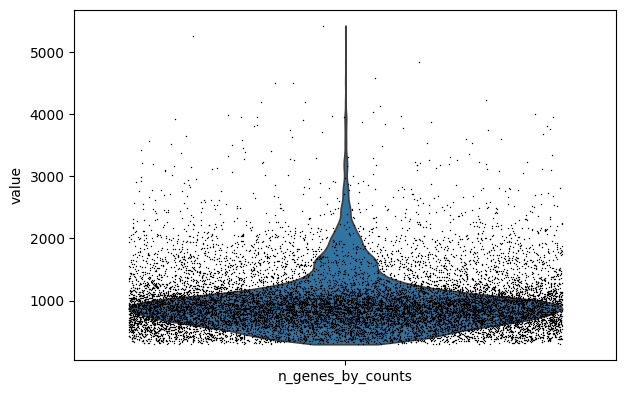

In [24]:
#Average number of genes with at least one detected identifier in each cell
sc.pl.violin(
    b_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

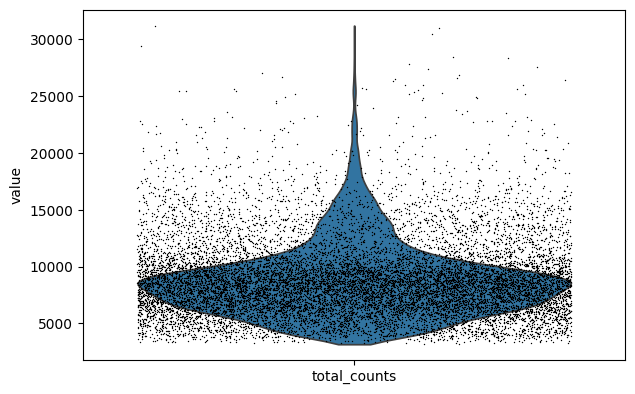

In [25]:
#Total number of molecules (UMI) detected in cell.
sc.pl.violin(
    b_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

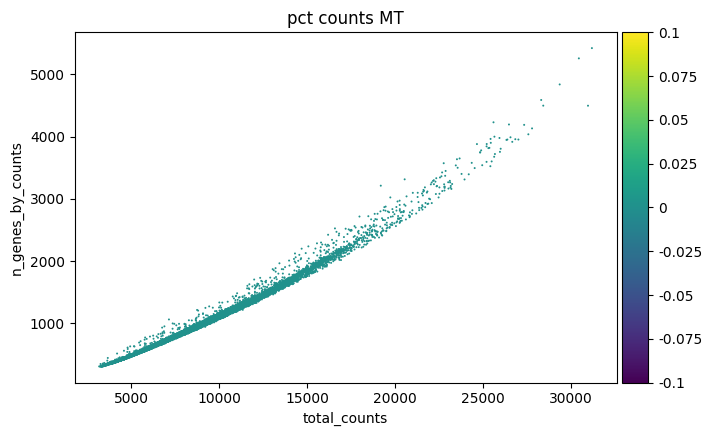

In [26]:
#Visualization of mt genes
sc.pl.scatter(b_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

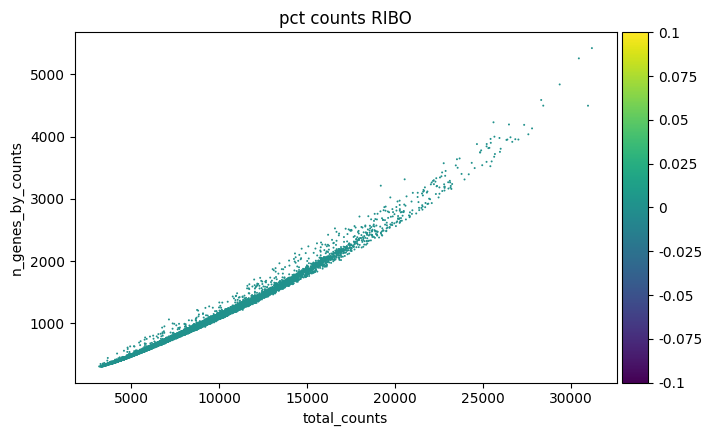

In [27]:
#visualization of ribosomal genes
sc.pl.scatter(b_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

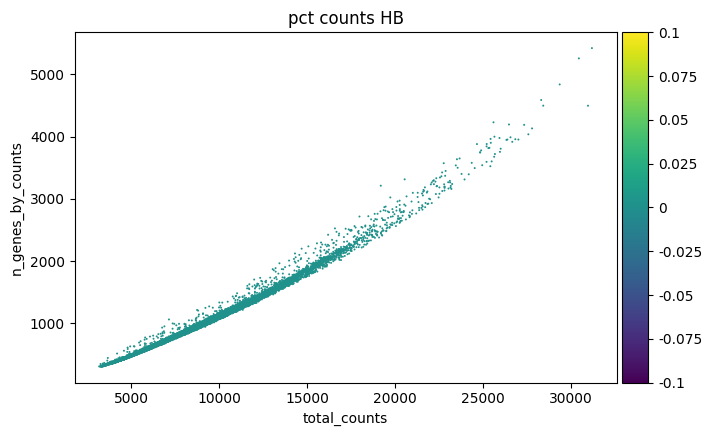

In [28]:
#Visualization of HB genes
sc.pl.scatter(b_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [29]:
b_marrow_adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

""" From the exploration of contaminats, it was found that there are no contaminations in this dataset """



In [30]:
!pip install scrublet

import scrublet as scr
import scipy.sparse as sp

sc.pp.scrublet(b_marrow_adata)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551806 sha256=801f0d99e9a19da46cf311323715835a20baa66dd7c101af4879008455104baf
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [31]:
# ---------- Scrublet doublet detection ----------

# 1. Get raw counts for Scrublet
if "counts" in b_marrow_adata.layers:
    counts_matrix = b_marrow_adata.layers["counts"]
else:
    # fallback: assume X still holds raw counts
    counts_matrix = b_marrow_adata.X

# Convert sparse to dense if needed
if sp.issparse(counts_matrix):
    counts_matrix = counts_matrix.toarray()

# 2. Initialize Scrublet
scrub = scr.Scrublet(
    counts_matrix,
    expected_doublet_rate=0.06  # 6% prior; fine for coursework unless told otherwise
)

# 3. Run Scrublet to get scores + calls
doublet_scores, predicted_doublets = scrub.scrub_doublets()

# 4. Store in .obs as proper columns
b_marrow_adata.obs["doublet_score"] = doublet_scores
b_marrow_adata.obs["predicted_doublet"] = predicted_doublets

# 5. Sanity check
b_marrow_adata.obs[["doublet_score", "predicted_doublet"]].head()


Preprocessing...


/usr/local/lib/python3.12/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.12/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 9.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
Elapsed time: 60.3 seconds


doublet_score  predicted_doublet
index                                                   
Guo-AAACCTGAGAGCTTCT-2       0.016600              False
Guo-AAACCTGAGAGGTTGC-7       0.028139              False
Guo-AAACCTGAGATACACA-3       0.124144              False
Guo-AAACCTGAGCGATTCT-1       0.042846              False
Guo-AAACCTGAGTGAAGAG-3       0.044715              False

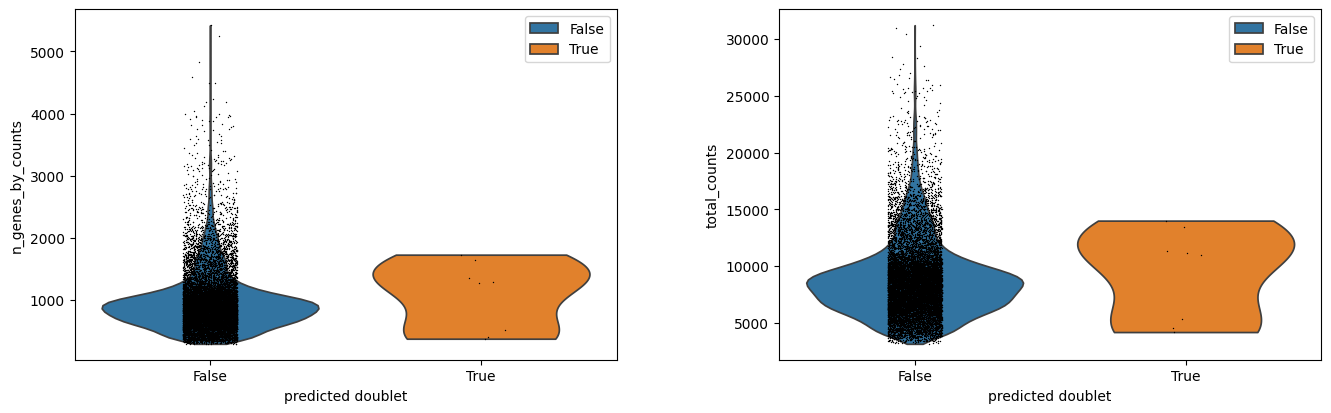

In [34]:
# Compare QC metrics between singlets and predicted doublets
b_marrow_adata.obs['predicted_doublet'] = b_marrow_adata.obs['predicted_doublet'].astype('category')
sc.pl.violin(
    b_marrow_adata,
    ["n_genes_by_counts", "total_counts"],
    groupby="predicted_doublet",
    multi_panel=True
)

In [91]:
# ---------- Filter out predicted doublets ----------

before = b_marrow_adata.n_obs
b_marrow_adata = b_marrow_adata[b_marrow_adata.obs["predicted_doublet"] == False].copy()
after = b_marrow_adata.n_obs

print(f"Removed {before - after} predicted doublets; remaining {after} cells.")

Removed 8 predicted doublets; remaining 14775 cells.


Normalization
Adjust sequencing depth differences between cells.
Aim is to scale counts so each cell has the same total expression.

In [41]:
#Save a copy of the bone marrow data
b_marrow_adata.layers["counts"] = b_marrow_adata.X.copy()

In [42]:
#Normalizing to median total counts
sc.pp.normalize_total(b_marrow_adata)
#Log of the data
sc.pp.log1p(b_marrow_adata)

In [43]:
#Selecting top 1000 most variable genes
sc.pp.highly_variable_genes(b_marrow_adata, n_top_genes=1000)

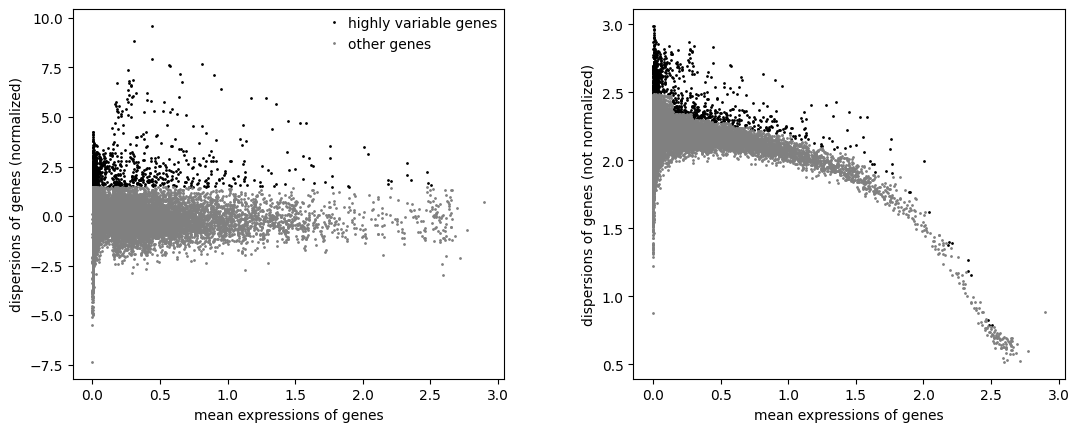

In [44]:
sc.pl.highly_variable_genes(b_marrow_adata)

""" Dimensionality Reduction (PCA) PCA is used to reduce data complexity and show variation patterns. """

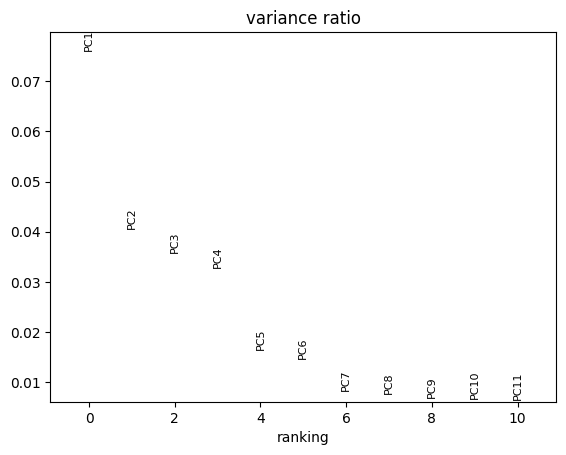

In [45]:
sc.tl.pca(b_marrow_adata)
sc.pl.pca_variance_ratio(b_marrow_adata, n_pcs=10, log=False)

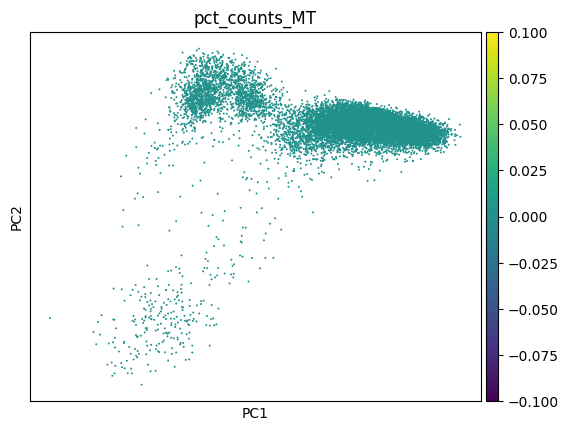

In [46]:
sc.pl.pca(
    b_marrow_adata,
    color=["pct_counts_MT"]
)

In [47]:
sc.pp.neighbors(b_marrow_adata)
sc.tl.umap(b_marrow_adata)

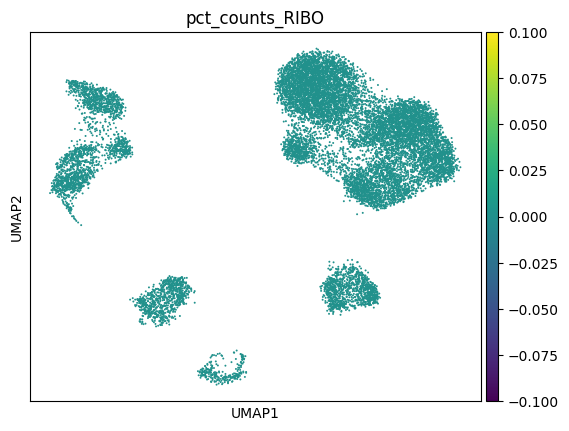

In [48]:
sc.pl.umap(
    b_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [49]:
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2)

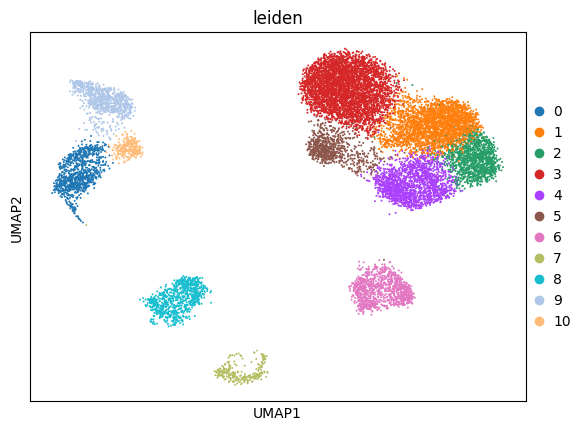

In [50]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden"],
    size=8,
)

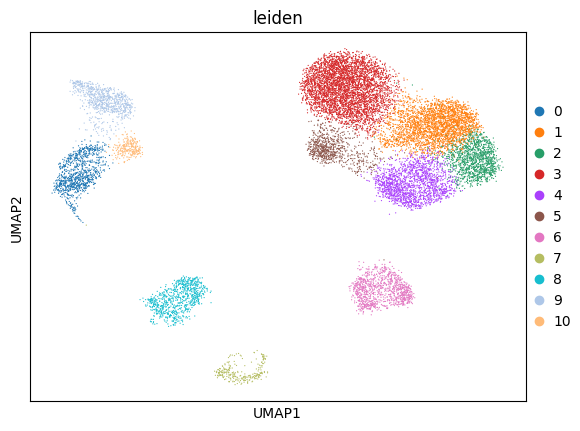

In [51]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden"],
    wspace=0.5,
    size=3,
    ncols = 1
)

In [52]:
b_marrow_adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

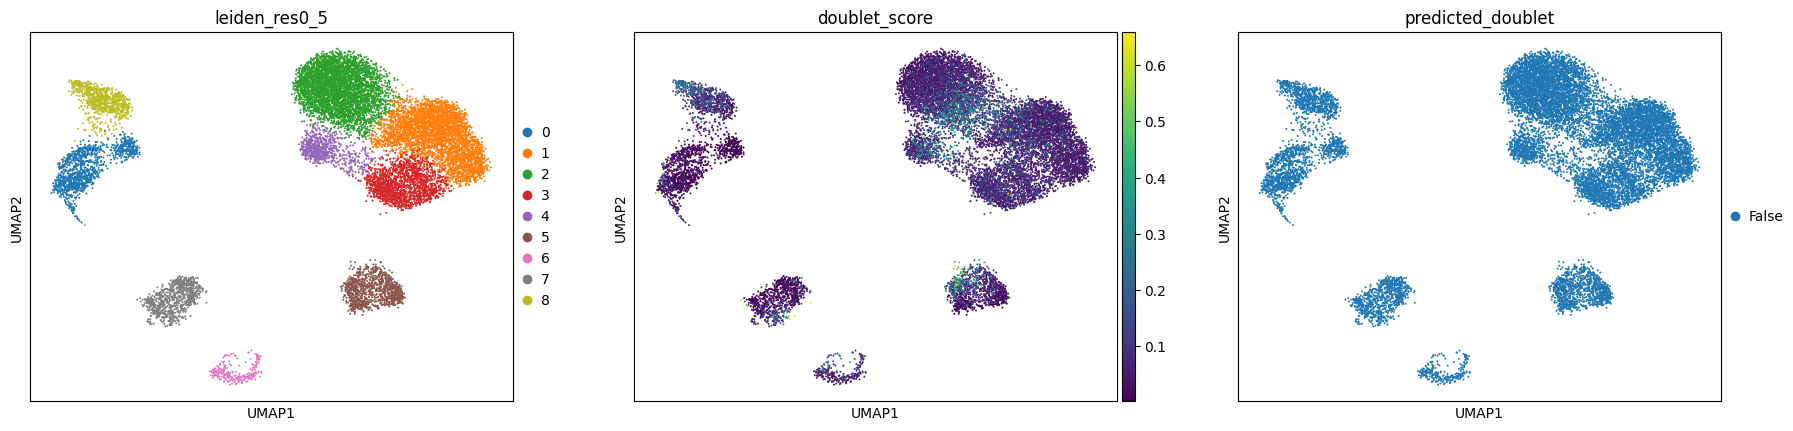

In [93]:
sc.pl.umap(b_marrow_adata, color=["leiden_res0_5", "doublet_score", "predicted_doublet"])

In [54]:
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

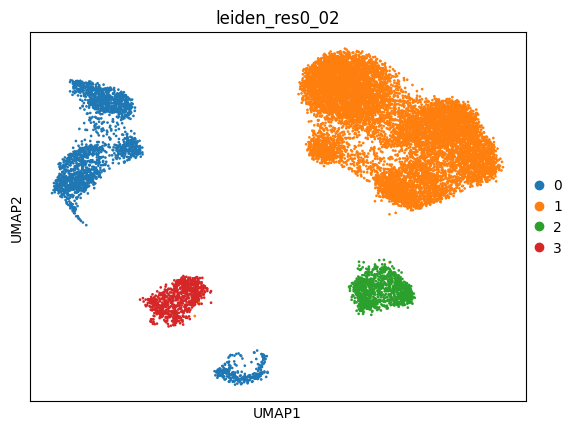

In [55]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

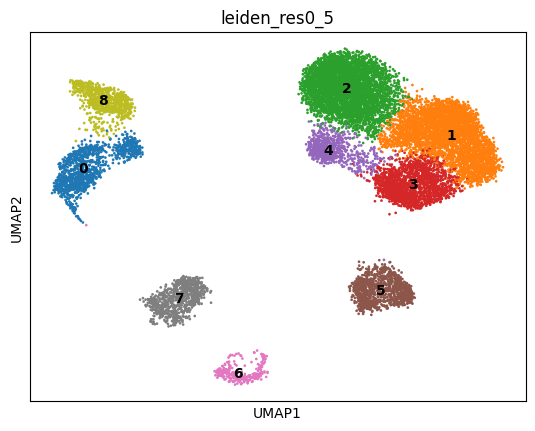

In [56]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden_res0_5"],
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

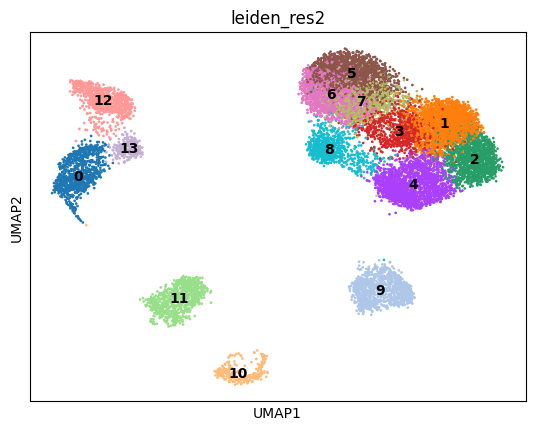

In [57]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden_res2"],
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

""" Cell annotation
Assign biological meaning to each cluster found in the dataset.

In [37]:
import decoupler as dc

In [58]:
# Query Omnipath and get CellMarker
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.tail()

source   target
                                     
8201           B cells naive  ZNF286A
8202  Pluripotent stem cells   ZNF296
8203              Adipocytes   ZNF423
8205        Gamma (PP) cells   ZNF503
8208              Germ cells    ZPBP2

In [33]:
# This line was causing an error and is not a valid operation for a pandas DataFrame.
# If you intended to remove the 'markers' variable from memory, you could use 'del markers'.
# markers.free()

In [59]:
import pandas as pd
import decoupler as dc

# Query Omnipath and get CellMarker
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]

# Convert 'feature_name' column to a plain Index of strings before assigning to var_names
b_marrow_adata.var_names = pd.Index(b_marrow_adata.var['feature_name'].astype(str))
b_marrow_adata.var_names_make_unique()

dc.mt.ulm(data=b_marrow_adata,
          net=markers,
          tmin = 3)

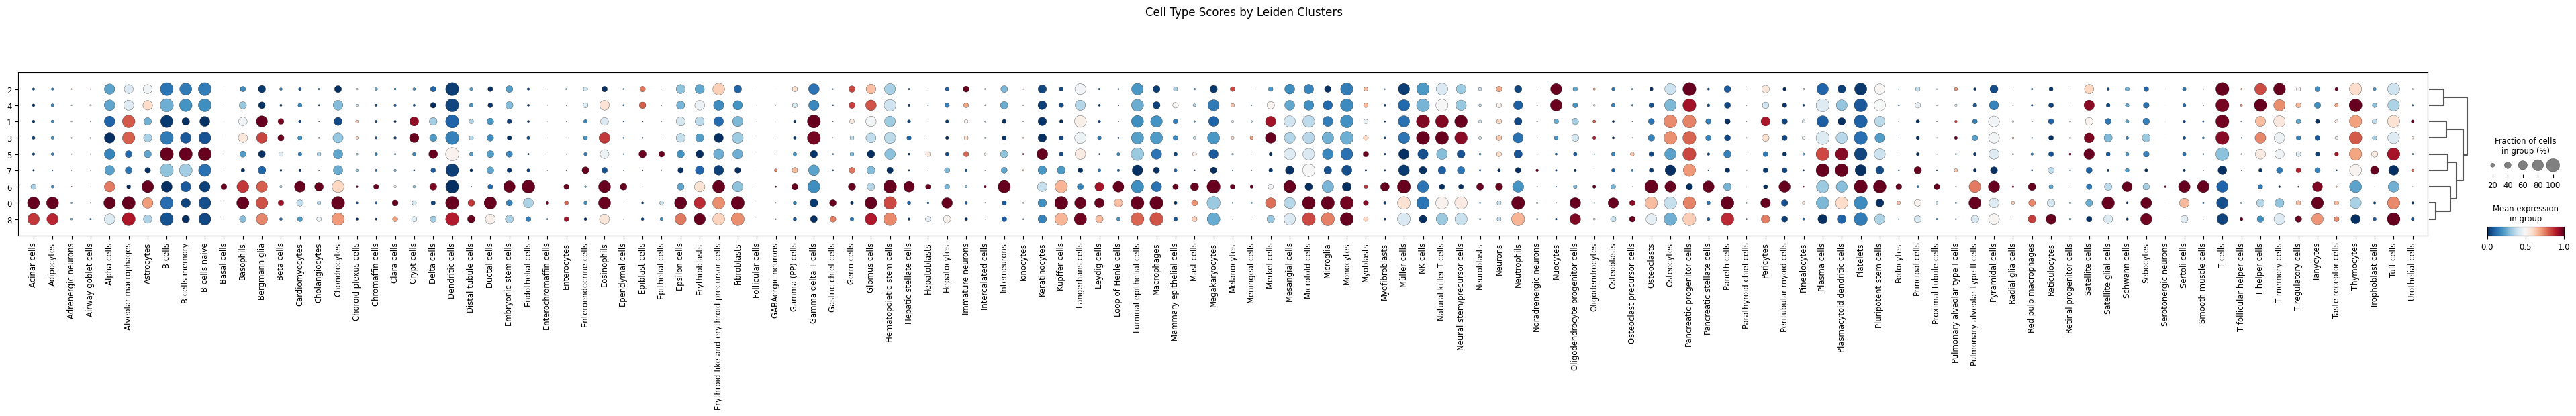

In [61]:
import pandas as pd
import decoupler as dc

# retrieve the score for each cell type
score = dc.pp.get_obsm(b_marrow_adata, key="score_ulm")

sc.pl.dotplot(
    score, # Use the 'score' AnnData object directly
    var_names=score.var_names.tolist(), # List of cell types (features)
    groupby='leiden_res0_5',
    cmap='RdBu_r', # A common colormap for scores
    dendrogram=True,
    standard_scale='var', # Scale scores for better visualization
    title='Cell Type Scores by Leiden Clusters'
)

In [62]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(b_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14783 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [63]:
#preview the data
b_marrow_adata.obsm["score_ulm"].head()

Acinar cells  Adipocytes  Adrenergic neurons  \
index                                                                  
Guo-AAACCTGAGAGCTTCT-2      0.883187    0.016170           -0.592763   
Guo-AAACCTGAGAGGTTGC-7     -0.906472   -1.284357           -0.467944   
Guo-AAACCTGAGATACACA-3     -0.892511   -0.682593           -0.460737   
Guo-AAACCTGAGCGATTCT-1     -0.922332   -0.772989           -0.476131   
Guo-AAACCTGAGTGAAGAG-3     -0.643714   -0.510408           -0.332304   

                        Airway goblet cells  Alpha cells  \
index                                                      
Guo-AAACCTGAGAGCTTCT-2            -0.662750     0.835668   
Guo-AAACCTGAGAGGTTGC-7            -0.523193     1.582967   
Guo-AAACCTGAGATACACA-3            -0.515135     1.573109   
Guo-AAACCTGAGCGATTCT-1            -0.532347     0.269735   
Guo-AAACCTGAGTGAAGAG-3            -0.371538    -0.621868   

                        Alveolar macrophages  Astrocytes   B cells  \
index                                                                
Guo-AAACCTGAGAGCTTCT-2              0.855594    0.297346  1.485389   
Guo-AAACCTGAGAGGTTGC-7              1.219191    0.157594  0.487636   
Guo-AAACCTGAGATACACA-3              1.187767    1.655807  3.930385   
Guo-AAACCTGAGCGATTCT-1              1.180712    0.774228  4.511872   
Guo-AAACCTGAGTGAAGAG-3              1.977561    0.019229  1.642716   

                        B cells memory  B cells naive  ...  \
index                                                  ...   
Guo-AAACCTGAGAGCTTCT-2       -0.306815       0.237718  ...   
Guo-AAACCTGAGAGGTTGC-7       -0.624588       1.769927  ...   
Guo-AAACCTGAGATACACA-3        1.925685       2.499717  ...   
Guo-AAACCTGAGCGATTCT-1        1.123621       1.731355  ...   
Guo-AAACCTGAGTGAAGAG-3        2.015968       2.029778  ...   

                        T follicular helper cells  T helper cells  \
index                                                               
Guo-AAACCTGAGAGCTTCT-2                  -0.513332       -0.423009   
Guo-AAACCTGAGAGGTTGC-7                  -0.405239        3.167803   
Guo-AAACCTGAGATACACA-3                  -0.398998        1.170179   
Guo-AAACCTGAGCGATTCT-1                  -0.412329        0.080979   
Guo-AAACCTGAGTGAAGAG-3                  -0.287775        2.170269   

                        T memory cells  T regulatory cells  Tanycytes  \
index                                                                   
Guo-AAACCTGAGAGCTTCT-2        1.642706           -0.004524   0.544171   
Guo-AAACCTGAGAGGTTGC-7       -0.405239            0.462816   0.897705   
Guo-AAACCTGAGATACACA-3        2.442422           -0.798214   0.924883   
Guo-AAACCTGAGCGATTCT-1        2.299860           -0.824884  -0.673433   
Guo-AAACCTGAGTGAAGAG-3        3.344257            1.184726  -0.470005   

                        Taste receptor cells  Thymocytes  Trophoblast cells  \
index                                                                         
Guo-AAACCTGAGAGCTTCT-2              0.413653   -0.543569          -0.513332   
Guo-AAACCTGAGAGGTTGC-7              0.897705    3.847757          -0.405239   
Guo-AAACCTGAGATACACA-3             -0.651660    1.906150           2.286251   
Guo-AAACCTGAGCGATTCT-1             -0.673433    0.929608          -0.412329   
Guo-AAACCTGAGTGAAGAG-3             -0.470005   -0.761788          -0.287775   

                        Tuft cells  Urothelial cells  
index                                                 
Guo-AAACCTGAGAGCTTCT-2    3.113613         -0.784226  
Guo-AAACCTGAGAGGTTGC-7   -0.202539         -0.619088  
Guo-AAACCTGAGATACACA-3    0.851429         -0.609553  
Guo-AAACCTGAGCGATTCT-1    1.709258         -0.629920  
Guo-AAACCTGAGTGAAGAG-3    1.786946         -0.439636  

[5 rows x 126 columns]

In [64]:
b_marrow_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)

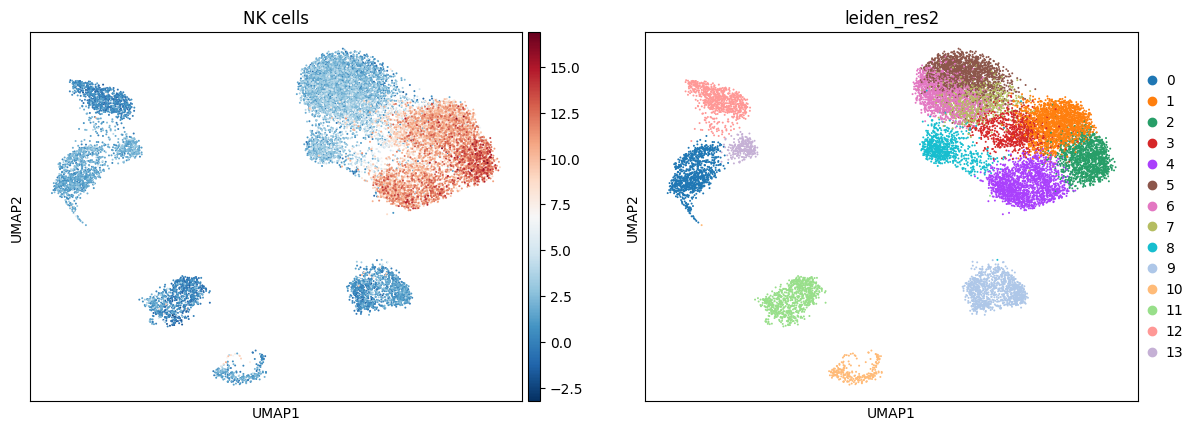

In [112]:
sc.pl.umap(score, color=["NK cells", "leiden_res2"], cmap="RdBu_r")

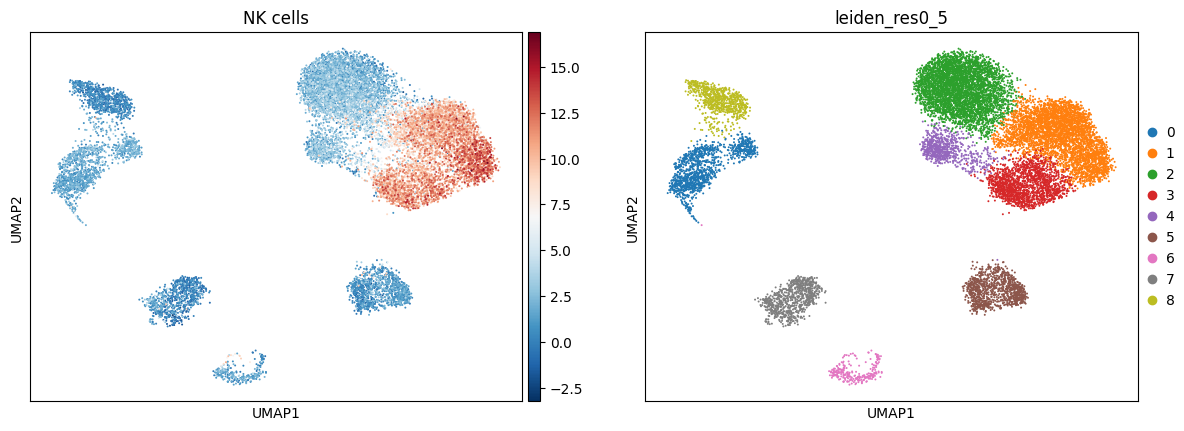

In [113]:
sc.pl.umap(score, color=["NK cells", "leiden_res0_5"], cmap="RdBu_r")

In [106]:
# 1. Get cell-type scores as DataFrame
score = dc.pp.get_obsm(b_marrow_adata, key="score_ulm")

# 2. Rank signatures per cluster for your main clustering
rank_df = dc.tl.rankby_group(
    score,
    groupby="leiden_res2",  # use the same clustering
    reference="rest",
    method="t-test_overestim_var",
)

# Keep only positive stats (enriched vs rest)
rank_df = rank_df[rank_df["stat"] > 0]

# 3. Take top signature per cluster
cluster_auto = (
    rank_df
    .sort_values(["group", "stat"], ascending=[True, False])
    .groupby("group")
    .head(1)
    .set_index("group")["name"]   # 'name' = signature (e.g. "Neutrophils")
    .to_dict()
)

cluster_auto

/tmp/ipython-input-4128719622.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")


{'0': 'Neutrophils',
 '1': 'NK cells',
 '10': 'Platelets',
 '11': 'Plasma cells',
 '12': 'Monocytes',
 '13': 'Neutrophils',
 '2': 'Gamma delta T cells',
 '3': 'Gamma delta T cells',
 '4': 'NK cells',
 '5': 'Nuocytes',
 '6': 'Nuocytes',
 '7': 'Nuocytes',
 '8': 'Nuocytes',
 '9': 'B cells naive'}

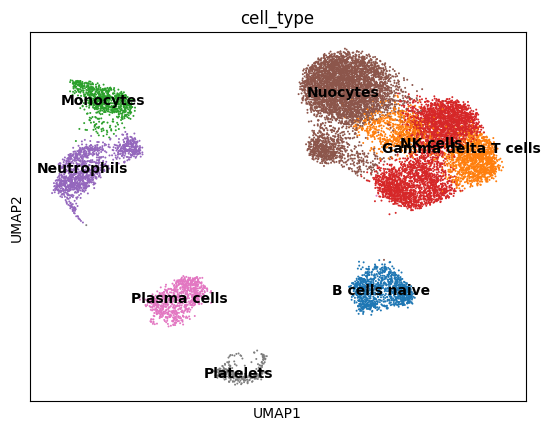

In [109]:
b_marrow_adata.obs["cell_type"] = (
    b_marrow_adata.obs["leiden_res2"].map(cluster_auto)
).astype("category")

sc.pl.umap(b_marrow_adata, color=["cell_type"], legend_loc="on data")

In [104]:
# 1. Get cell-type scores as DataFrame
score = dc.pp.get_obsm(b_marrow_adata, key="score_ulm")

# 2. Rank signatures per cluster for your main clustering
rank_df = dc.tl.rankby_group(
    score,
    groupby="leiden_res0_02",  # use the same clustering
    reference="rest",
    method="t-test_overestim_var",
)

# Keep only positive stats (enriched vs rest)
rank_df = rank_df[rank_df["stat"] > 0]

# 3. Take top signature per cluster
cluster_auto = (
    rank_df
    .sort_values(["group", "stat"], ascending=[True, False])
    .groupby("group")
    .head(1)
    .set_index("group")["name"]   # 'name' = signature (e.g. "Neutrophils")
    .to_dict()
)

cluster_auto

/tmp/ipython-input-2218737923.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")


{'0': 'Neutrophils', '1': 'T cells', '2': 'B cells naive', '3': 'Plasma cells'}

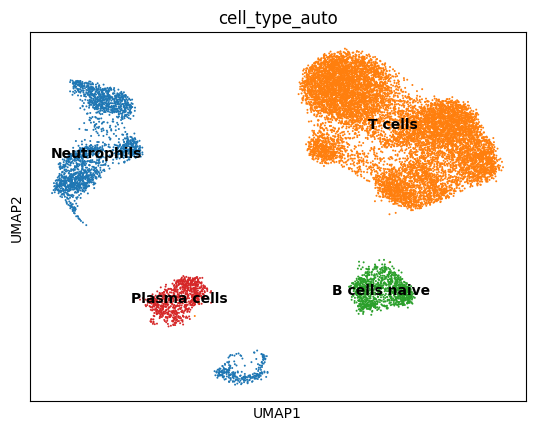

In [105]:
b_marrow_adata.obs["cell_type_auto"] = (
    b_marrow_adata.obs["leiden_res0_02"].map(cluster_auto)
).astype("category")

sc.pl.umap(b_marrow_adata, color=["cell_type_auto"], legend_loc="on data")

In [96]:
# 1. Get cell-type scores as DataFrame
score = dc.pp.get_obsm(b_marrow_adata, key="score_ulm")

# 2. Rank signatures per cluster for your main clustering
rank_df = dc.tl.rankby_group(
    score,
    groupby="leiden_res0_5",  # use the same clustering
    reference="rest",
    method="t-test_overestim_var",
)

# Keep only positive stats (enriched vs rest)
rank_df = rank_df[rank_df["stat"] > 0]

# 3. Take top signature per cluster
cluster_auto = (
    rank_df
    .sort_values(["group", "stat"], ascending=[True, False])
    .groupby("group")
    .head(1)
    .set_index("group")["name"]   # 'name' = signature (e.g. "Neutrophils")
    .to_dict()
)

cluster_auto

/tmp/ipython-input-237133499.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")


{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '2': 'Nuocytes',
 '3': 'NK cells',
 '4': 'Nuocytes',
 '5': 'B cells naive',
 '6': 'Platelets',
 '7': 'Plasma cells',
 '8': 'Monocytes'}

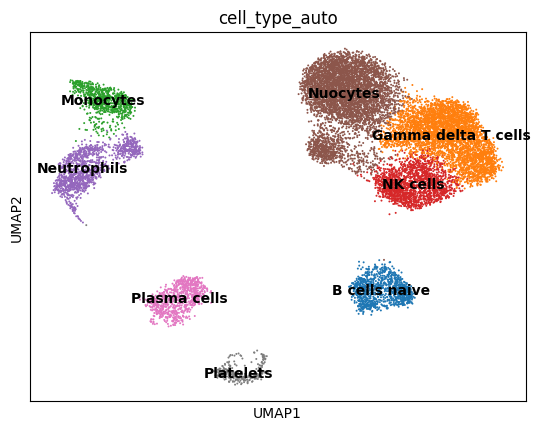

In [97]:
b_marrow_adata.obs["cell_type_auto"] = (
    b_marrow_adata.obs["leiden_res0_5"].map(cluster_auto)
).astype("category")

sc.pl.umap(b_marrow_adata, color=["cell_type_auto"], legend_loc="on data")

In [68]:
import seaborn as sns

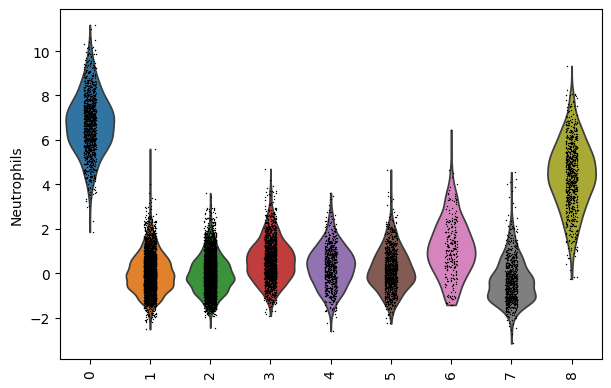

In [98]:
sc.pl.violin(score, keys=["Neutrophils"], groupby="leiden_res0_5", rotation=90)

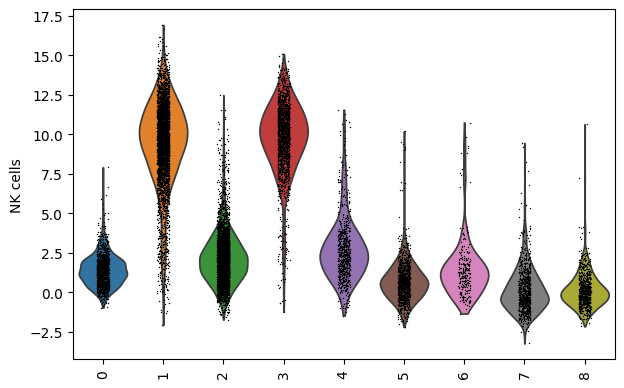

In [99]:
sc.pl.violin(score, keys=["NK cells"], groupby="leiden_res0_5", rotation=90)

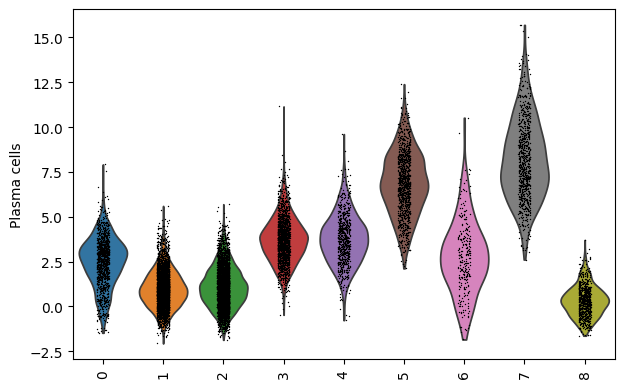

In [100]:
sc.pl.violin(score, keys=["Plasma cells"], groupby="leiden_res0_5", rotation=90)

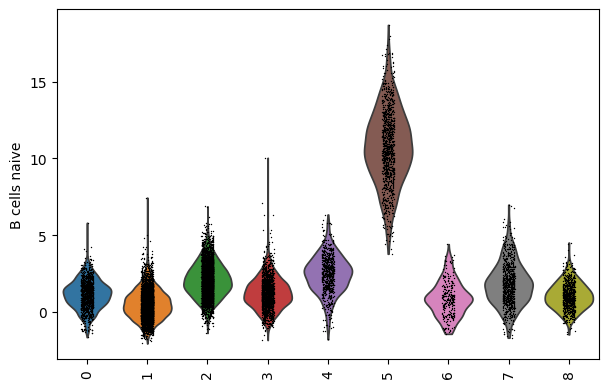

In [101]:
sc.pl.violin(score, keys=["B cells naive"], groupby="leiden_res0_5", rotation=90)

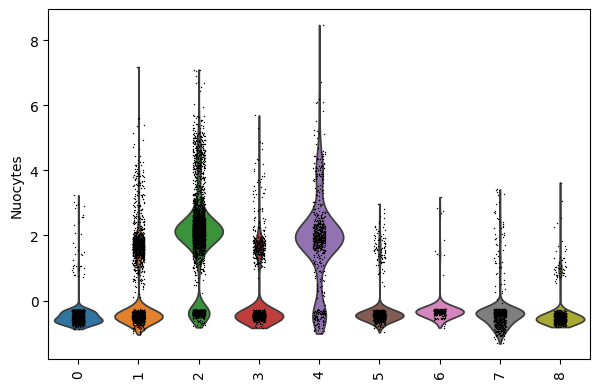

In [103]:
sc.pl.violin(score, keys=["Nuocytes"], groupby="leiden_res0_5", rotation=90)

In [76]:
#rank genes
b_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_02", reference="rest", method="t-test_overestim_var")
b_marrow_adata_rank = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0]

In [ ]:
#rank genes
b_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
b_marrow_adata_rank = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0]
b_marrow_adata_rank.head()

group reference             name        stat  meanchange  pval  padj
0     0      rest      Neutrophils  114.653687    6.386277   0.0   0.0
1     0      rest      Macrophages   88.443139    5.627834   0.0   0.0
2     0      rest  Dendritic cells   84.825821    5.375942   0.0   0.0
3     0      rest        Microglia   84.071634    4.280383   0.0   0.0
4     0      rest        Monocytes   80.642512    5.565005   0.0   0.0

In [77]:
#rank genes
b_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res2", reference="rest", method="t-test_overestim_var")
b_marrow_adata_rank = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0]
b_marrow_adata_rank.head()

group reference             name       stat  meanchange  pval  padj
0     0      rest      Neutrophils  93.947080    6.339924   0.0   0.0
1     0      rest      Macrophages  82.158617    5.888126   0.0   0.0
2     0      rest        Monocytes  74.287079    5.750912   0.0   0.0
3     0      rest  Dendritic cells  72.191256    5.285958   0.0   0.0
4     0      rest        Microglia  69.772474    4.153268   0.0   0.0

In [78]:
cluster_annotations = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-1605432823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [79]:
cluster_annotations

{'0': 'Neutrophils',
 '1': 'NK cells',
 '5': 'Nuocytes',
 '4': 'NK cells',
 '8': 'Nuocytes',
 '9': 'B cells naive',
 '10': 'Platelets',
 '7': 'Nuocytes',
 '6': 'Nuocytes',
 '3': 'Gamma delta T cells',
 '11': 'Plasma cells',
 '2': 'Gamma delta T cells',
 '12': 'Monocytes',
 '13': 'Neutrophils'}

In [80]:
b_marrow_adata.obs['cell_type'] = b_marrow_adata.obs['leiden_res0_02'].map(cluster_annotations)


In [81]:
b_marrow_adata.obs['cell_type'] = b_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)

In [82]:
b_marrow_adata.obs['cell_type'] = b_marrow_adata.obs['leiden_res2'].map(cluster_annotations)

In [83]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(b_marrow_adata.var_names)

neutro_markers = markers[markers['source'].isin(['Neutrophils'])]['target']
neutro_markers = neutro_markers[neutro_markers.isin(available_genes)]

macro_markers = markers[markers['source'].isin(['Macrophages'])]['target']
macro_markers = macro_markers[macro_markers.isin(available_genes)]

den_cells_markers = markers[markers['source'].isin(['Dendritic cells'])]['target']
den_cells_markers = den_cells_markers[den_cells_markers.isin(available_genes)]

kup_cells_markers = markers[markers['source'].isin(['Kupffer cells'])]['target']
kup_cells_markers = kup_cells_markers[kup_cells_markers.isin(available_genes)]

micro_markers = markers[markers['source'].isin(['Microglia'])]['target']
micro_markers = micro_markers[micro_markers.isin(available_genes)]

In [84]:
marker_genes_dict = {
    "Neutrophils":neutro_markers.head().tolist(),
    "Macrrophages": macro_markers.head().tolist(),
    "Dendritic cells": den_cells_markers.head().tolist(),
     "Kupffer cells": kup_cells_markers.head().tolist(),
     "Microglia": micro_markers.head().tolist()
}

In [85]:
sc.tl.dendrogram

<function scanpy.tools._dendrogram.dendrogram(adata: 'AnnData', groupby: 'str | Sequence[str]', *, n_pcs: 'int | None' = None, use_rep: 'str | None' = None, var_names: 'Sequence[str] | None' = None, use_raw: 'bool | None' = None, cor_method: 'str' = 'pearson', linkage_method: 'str' = 'complete', optimal_ordering: 'bool' = False, key_added: 'str | None' = None, inplace: 'bool' = True) -> 'dict[str, Any] | None'>

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Macrrophages, Dendritic cells, etc.


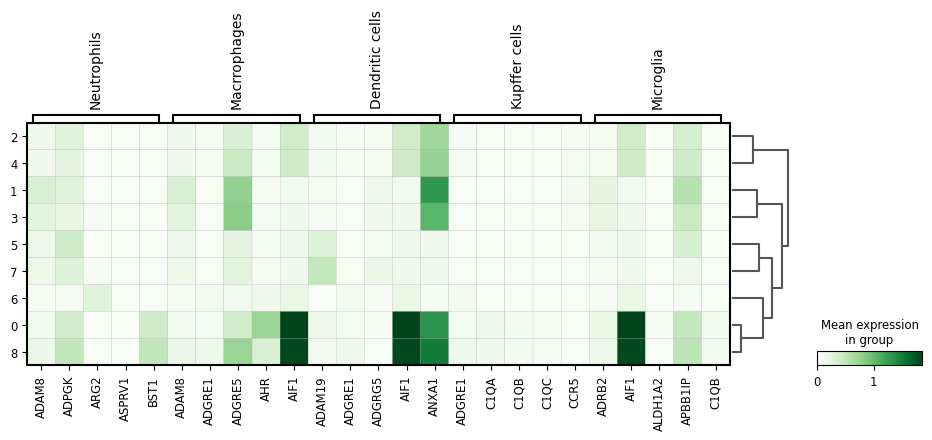

In [86]:
sc.tl.dendrogram(b_marrow_adata, groupby="leiden_res0_5")
sc.pl.matrixplot(
    b_marrow_adata,
    marker_genes_dict,
    "leiden_res0_5",
    dendrogram=True,
    cmap="Greens",
    use_raw=False
)

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Macrrophages, Dendritic cells, etc.


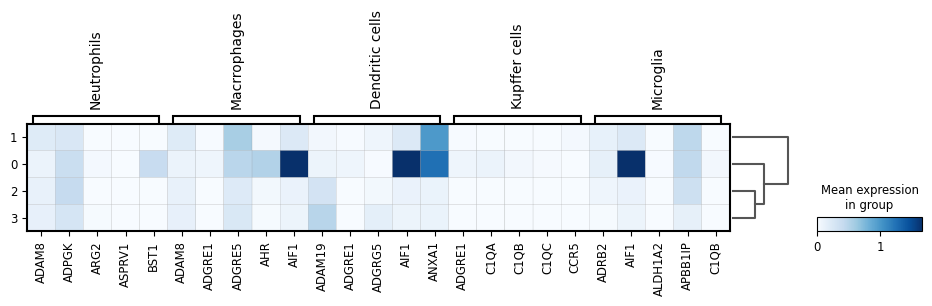

In [87]:
sc.tl.dendrogram(b_marrow_adata, groupby="leiden_res0_02")
sc.pl.matrixplot(
    b_marrow_adata,
    marker_genes_dict,
    "leiden_res0_02",
    dendrogram=True,
    cmap="Blues",
    use_raw=False
)

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Macrrophages, Dendritic cells, etc.


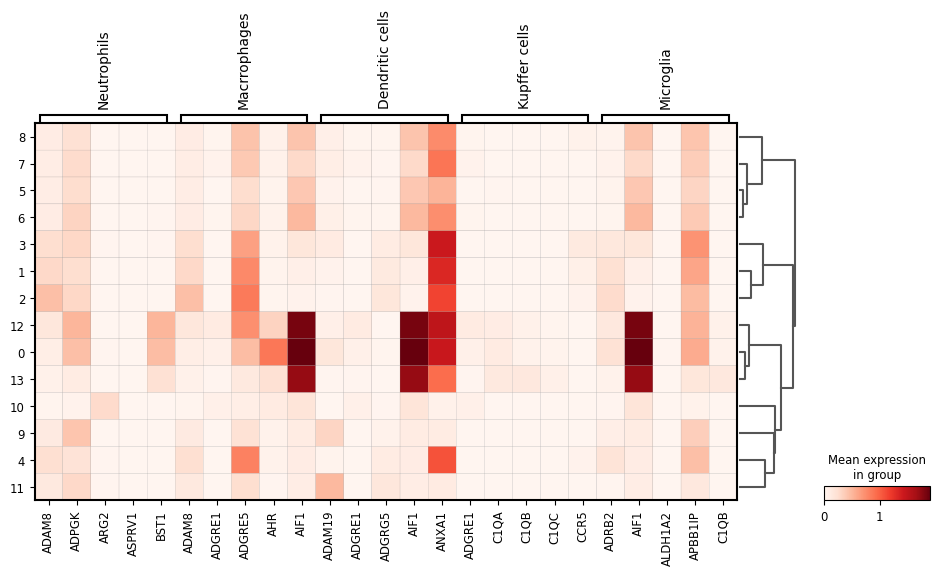

In [88]:
sc.tl.dendrogram(b_marrow_adata, groupby="leiden_res2")
sc.pl.matrixplot(
    b_marrow_adata,
    marker_genes_dict,
    "leiden_res2",
    dendrogram=True,
    cmap="Reds",
    use_raw=False
)

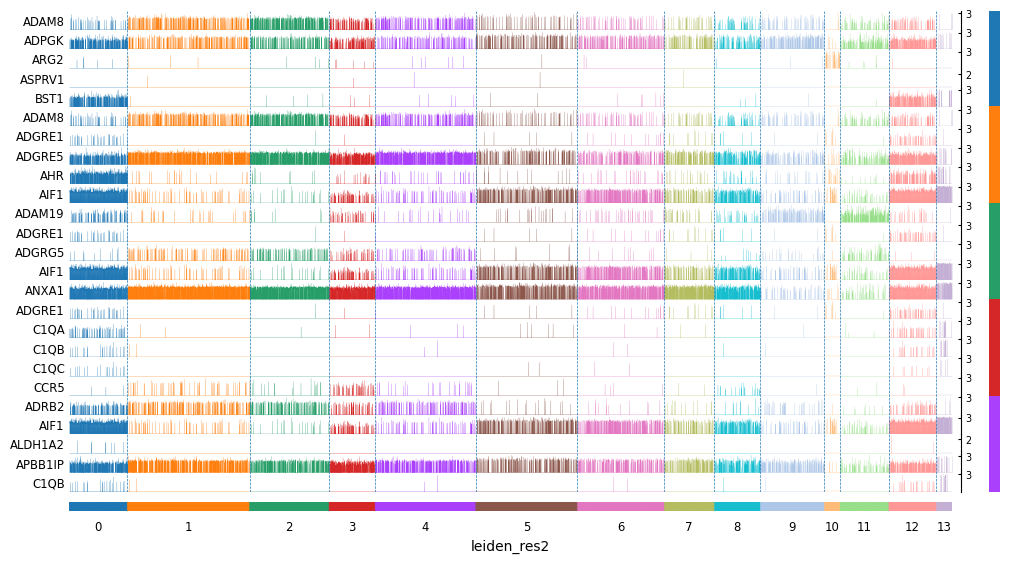

In [89]:
sc.pl.tracksplot(b_marrow_adata, marker_genes_dict, groupby="leiden_res2", dendrogram=False, use_raw=False)

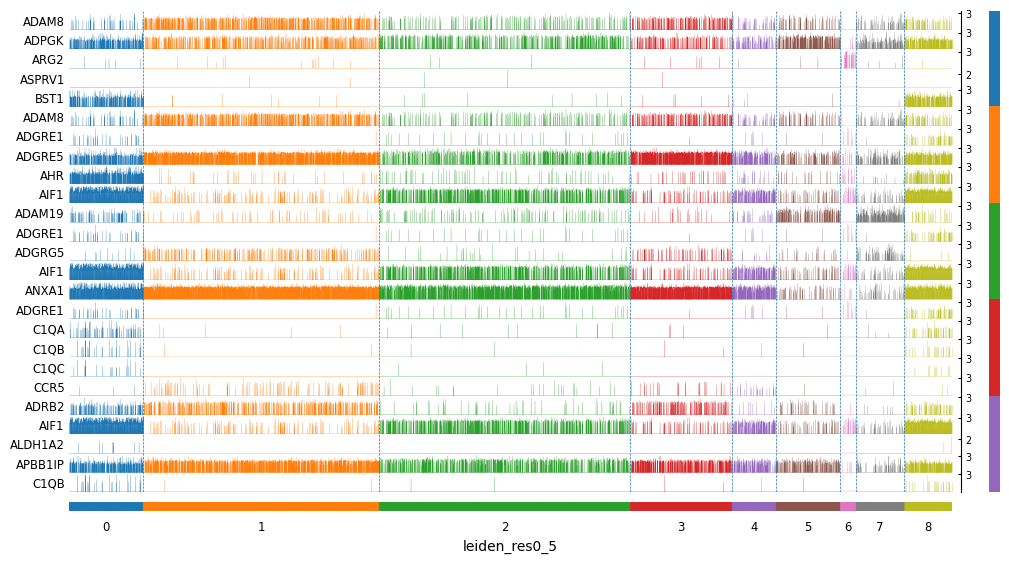

In [90]:
b_marrow_adata.var.index = b_marrow_adata.var.index.astype(str)
b_marrow_adata.var_names_make_unique()
sc.pl.tracksplot(b_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", dendrogram=False, use_raw=False)

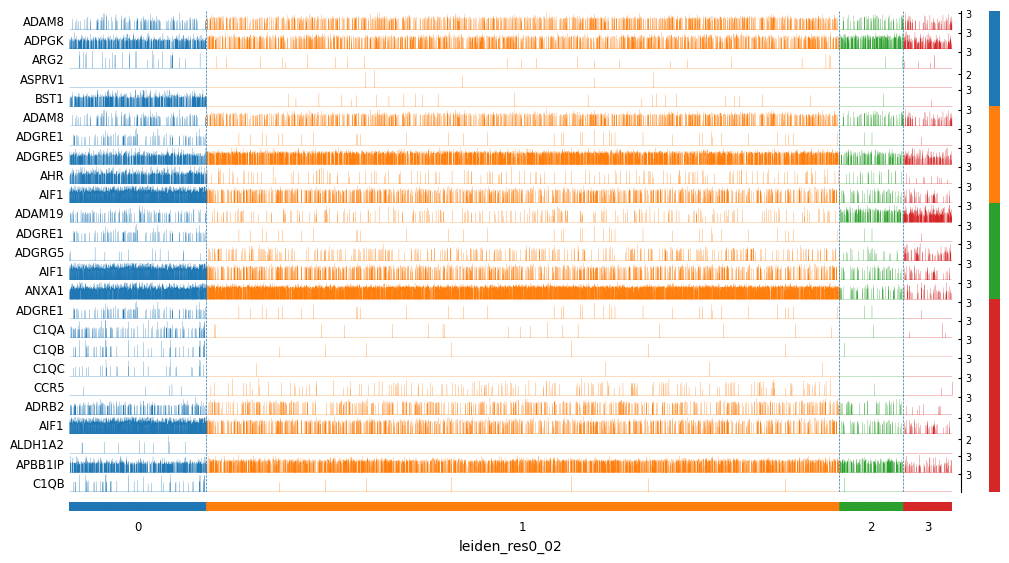

In [ ]:
b_marrow_adata.var.index = b_marrow_adata.var.index.astype(str)
b_marrow_adata.var_names_make_unique()
sc.pl.tracksplot(b_marrow_adata, marker_genes_dict, groupby="leiden_res0_02", dendrogram=False, use_raw=False)